### sklearn.metrics.precision_score
 - sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.recall_score
 - sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.f1_score
 - sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
     - F1 = 2 * (precision * recall) / (precision + recall)

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eva(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)

    print('오차 행렬')
    print(confusion)
    print(f'정확도: {0:4f}, 정밀도:{1:4f}, 재현율:{2:4f} , f1Score:{3:4f}'.format(accuracy,precision,recall))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/ 테스트 데이터 분할.
titanic_df = pd.read_csv('../ML_datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df= transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df,y_titanic_df, test_size=0.20,random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train,y_train)
lr_pred =lr_clf.predict(x_test)
get_clf_eva(y_test, lr_pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.000000, 정밀도:1.000000, 재현율:2.000000 , f1Score:3.000000


c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
lr_pred_prob =lr_clf.predict_proba(x_test)

In [38]:
lr_pred_prob[:,1]

array([0.5380844 , 0.12126768, 0.12278963, 0.11739047, 0.14475114,
       0.11776475, 0.11153053, 0.79119897, 0.21711828, 0.63066724,
       0.10020537, 0.12495401, 0.1227956 , 0.11157631, 0.56335668,
       0.14095142, 0.09625791, 0.26652561, 0.27528523, 0.8282183 ,
       0.24635639, 0.38093806, 0.14531076, 0.18521542, 0.11194602,
       0.23445615, 0.140333  , 0.07411722, 0.28034734, 0.30454263,
       0.94725346, 0.81730761, 0.12687093, 0.82608049, 0.39954063,
       0.23445615, 0.07236826, 0.61103513, 0.05293679, 0.10387383,
       0.35078004, 0.0833206 , 0.82174248, 0.70781393, 0.63044212,
       0.63045837, 0.91886664, 0.35866542, 0.94888761, 0.11198046,
       0.59270567, 0.11157631, 0.13272964, 0.72536553, 0.30926167,
       0.19690279, 0.22634485, 0.12279067, 0.15412722, 0.43234777,
       0.2800562 , 0.10073064, 0.54539127, 0.51410172, 0.44436467,
       0.09456178, 0.66672583, 0.5940695 , 0.9518076 , 0.14813954,
       0.12884422, 0.16836073, 0.10387607, 0.94798177, 0.19860

### sklearn.metrics.precision_recall_curve
 - sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

In [39]:
from sklearn.metrics import precision_recall_curve

data = precision_recall_curve(y_test,lr_pred_prob[:,1])

Text(0, 0.5, 'probability density')

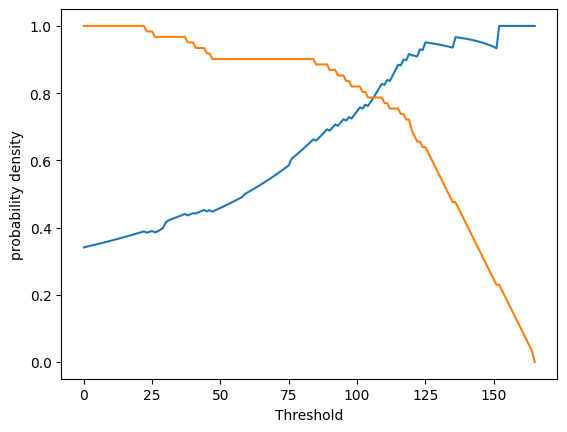

In [40]:
import matplotlib.pyplot as plt

plt.plot(data[0
              ])
plt.plot(data[1])
plt.xlabel('Threshold')
plt.ylabel('probability density')

### sklearn.metrics.roc_curve
 - sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

### sklearn.metrics.roc_auc_score
 - sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [42]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds =roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
# thresholds[0]운 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arrange는 1부터 시작 
thr_index=np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index',thr_index)
print('샘플 index로 추출한 임곗값', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값 [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


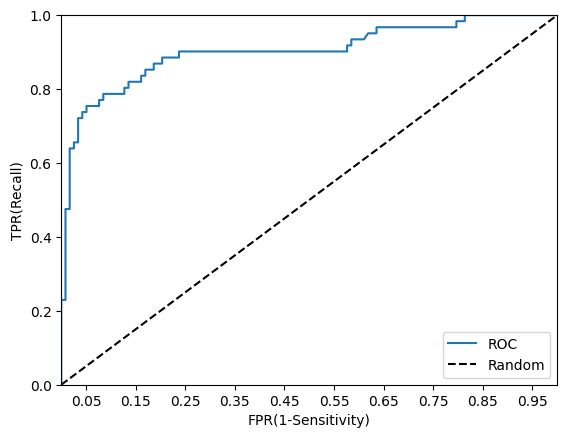

In [51]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds =roc_curve(y_test,pred_proba_c1)

    # roc curve를 plot 곡선을 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label ='Random')

    # FPR x축의 scale을 0,1 단위로 변경 x,y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])


In [54]:
from sklearn.metrics import roc_auc_score

# pred =lr_clf.predict(x_test)
# roc_score = roc_auc_score(y_test,pred)

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('ROC AUC값: {0:4f}'.format(roc_score))

ROC AUC값: 0.902403
